<a href="https://colab.research.google.com/github/Danangellotti/Ciencia_de_Datos_UGR_24/blob/main/Semana_04_Practica_04_resuelta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 004

Relacionada a Pandas y expresiones regulares.


Vamos a trabajar con los siguientes datasets:
- [twitter-dataset-for-sentiment-analysis](https://www.kaggle.com/datasets/dunyajasim/twitter-dataset-for-sentiment-analysis)

- [spanish-news-classification](https://www.kaggle.com/datasets/kevinmorgado/spanish-news-classification)


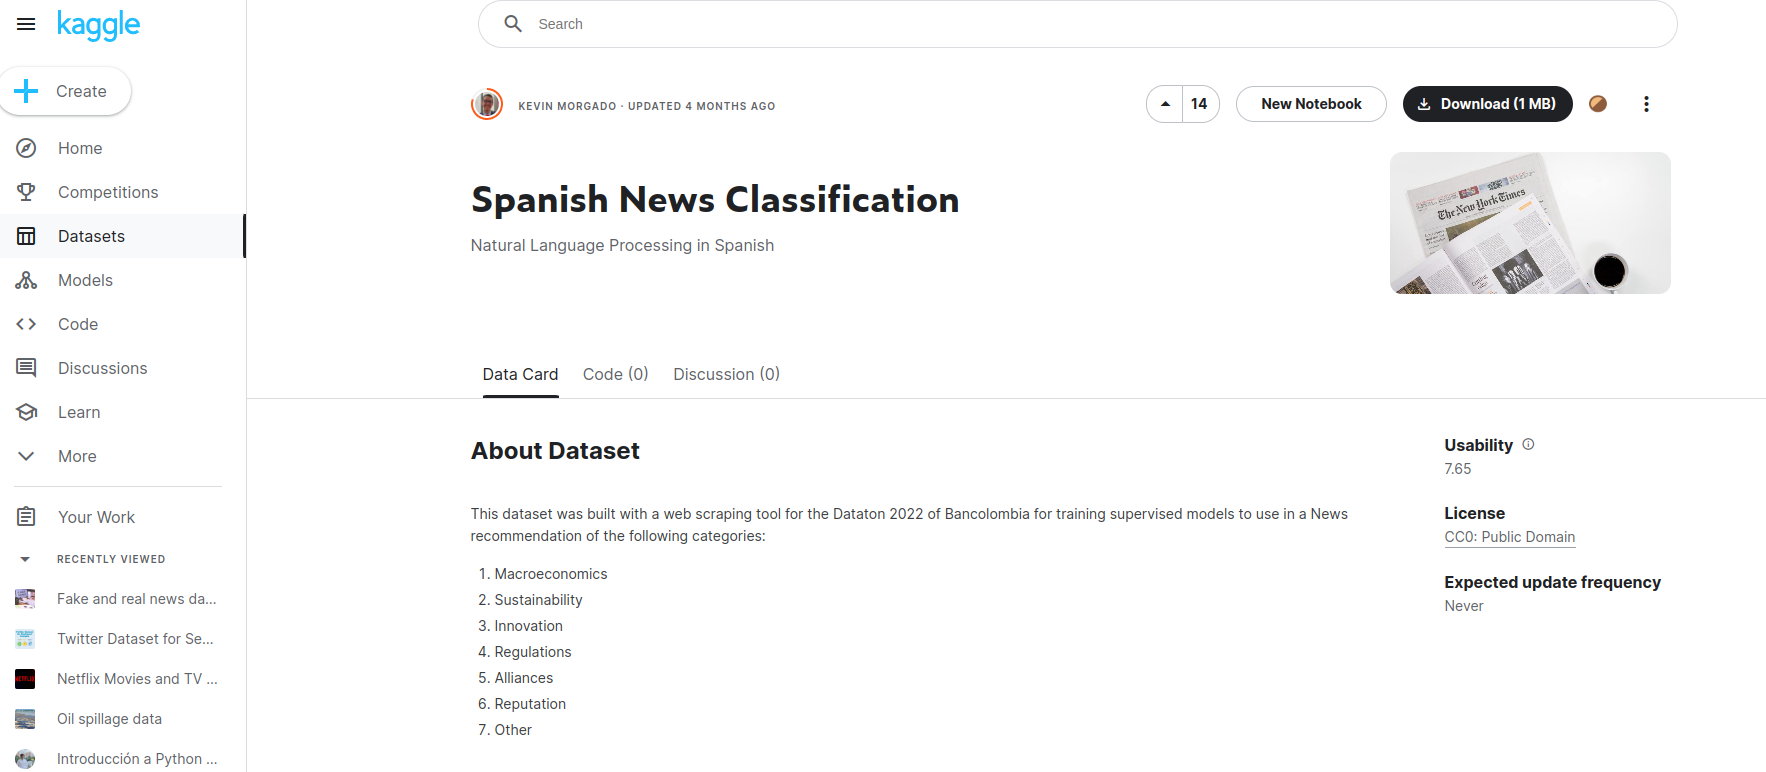

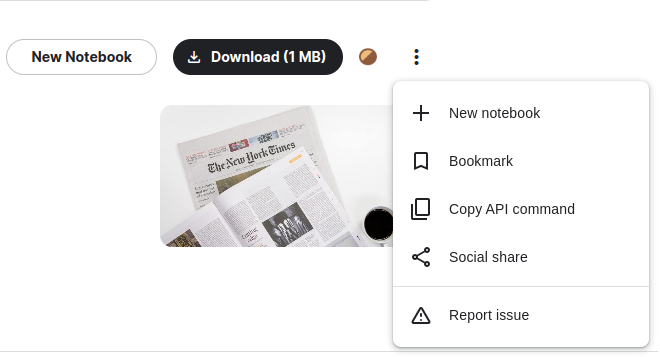

***Presionar el menú de hamburguesa o los 3 puntos y seleccionar `copy API command`***

In [ ]:
folder_dataset = "/content/drive/MyDrive/kaggle/datasets/"

# Ejercicio 01

Descargar el dataset `kevinmorgado/spanish-news-classificatio` desde kaggle, levantarlo con pandas y mostrar:
- Mostrar la cantidad de filas
- Mostrar la cantidad de columnas
- Mostrar la cantidad de celdas que posee el dataset
- Mostrar el nombre de las columnas
- Las primeras 10 filas
- Las últimas 15 filas

In [ ]:
from google.colab import drive, files
from pandas import read_csv, DataFrame, merge

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
folder_snc = f"{folder_dataset}spanish-news-classification"
!mkdir -p {folder_snc}

In [ ]:
!kaggle datasets download --unzip -d kevinmorgado/spanish-news-classification -p {folder_snc}

  0% 0.00/1.38M [00:00<?, ?B/s]
100% 1.38M/1.38M [00:00<00:00, 72.2MB/s]


In [ ]:
!ls {folder_snc}

df_total.csv


In [ ]:
df_01 = read_csv(f"{folder_snc}/df_total.csv")

In [ ]:
print("La cantidad de filas es: ", df_01.shape[0])
print("La cantidad de columnas es: ", df_01.shape[1])
print("La cantidad de celdas es: ", df_01.size)
print("Las columnas son: \n-", "\n- ".join(df_01.columns))

La cantidad de filas es:  1217
La cantidad de columnas es:  3
La cantidad de celdas es:  3651
Las columnas son: 
- url
- news
- Type


In [ ]:
df_01.head(10)

,url,news,Type
0,https://www.larepublica.co/redirect/post/3201905,Durante el foro La banca articulador empresari...,Otra
1,https://www.larepublica.co/redirect/post/3210288,El regulador de valores de China dijo el domin...,Regulaciones
2,https://www.larepublica.co/redirect/post/3240676,En una industria históricamente masculina como...,Alianzas
3,https://www.larepublica.co/redirect/post/3342889,Con el dato de marzo el IPC interanual encaden...,Macroeconomia
4,https://www.larepublica.co/redirect/post/3427208,Ayer en Cartagena se dio inicio a la versión n...,Otra
5,https://www.larepublica.co/redirect/post/3225281,El emprendimiento del sector inmobiliario Rent...,Alianzas
6,https://www.bbva.com/es/mx/mexico-y-el-desafio...,El país tiene pendiente generar más y mejores ...,Macroeconomia
7,https://www.bbva.com/es/podcast-agile-en-la-un...,En el 'podcast' tenemos el placer de entrevist...,Innovacion
8,https://www.bbva.com/es/la-ingenieria-social-e...,"El factor humano, normalmente identificado com...",Innovacion
9,https://www.bbva.com/es/que-hace-un-developer-...,Los perfiles que se demandan en un banco han e...,Innovacion


In [ ]:
df_01.tail(15)

,url,news,Type
1202,https://www.larepublica.co/redirect/post/3227980,El Departamento Administrativo Nacional de Est...,Macroeconomia
1203,https://www.larepublica.co/redirect/post/3324077,En 2021 Bbva en Colombia financió iniciativas ...,Otra
1204,https://www.larepublica.co/redirect/post/3393210,El Indicador adelantado del Índice de Precios ...,Macroeconomia
1205,https://www.bbva.com/es/pe/bbva-data-challenge...,BBVA ha organizado la cuarta edición del 'BBVA...,Innovacion
1206,https://www.larepublica.co/redirect/post/3402736,Las acciones estadounidenses se desplomaron de...,Macroeconomia
1207,https://www.larepublica.co/redirect/post/3036873,La política monetaria la dirige el Banco Repúb...,Regulaciones
1208,https://www.larepublica.co/redirect/post/3311883,Sorprendió el silencio de los candidatos presi...,Regulaciones
1209,https://www.larepublica.co/redirect/post/3401891,La Asociación de Transporte Aéreo Internaciona...,Alianzas
1210,https://www.larepublica.co/redirect/post/3292433,La XVI Cumbre de la Alianza del Pacífico se ll...,Alianzas
1211,https://www.larepublica.co/redirect/post/3312451,La inflación en España volvió a dispararse en ...,Macroeconomia


# Ejercicio 02

Descargar el dataset `criticas-peliculas-filmaffinity-en-espaniol` desde kaggle, levantarlo con pandas y mostrar:
- Mostrar la cantidad de filas
- Mostrar la cantidad de columnas
- Mostrar la cantidad de celdas que posee el dataset
- Mostrar el nombre de las columnas
- Las primeras 10 filas
- Las últimas 15 filas

`Este dataset debería tener un error en los separadores cuando se intenta levantar, encontrar la forma de levantarlo. Describir los pasos para arreglarlo.`


In [ ]:
folder_cpfee = f"{folder_dataset}/criticas-peliculas-filmaffinity-en-espaniol"
!mkdir -p {folder_cpfee}
!kaggle datasets download --unzip -d ricardomoya/criticas-peliculas-filmaffinity-en-espaniol -p {folder_cpfee}

  0% 0.00/4.11M [00:00<?, ?B/s]
100% 4.11M/4.11M [00:00<00:00, 120MB/s]


In [ ]:
!ls {folder_cpfee}

reviews_filmaffinity.csv


In [ ]:
import re
file = f"{folder_cpfee}/reviews_filmaffinity.csv"
# leo el archivo
with open(file) as r:
  text = r.read()
# reemplazo el | por un cardinal
text = re.sub(r"\s\|\s", "#",text)
# reemplazo el || por un |
text = re.sub(r"\|\|", "|",text)
# guardo el archivo
with open(file, "w") as w:
  w.write(text)


In [ ]:
df_02 = read_csv(file,  delimiter="|")

In [ ]:
print("La cantidad de filas es: ", df_02.shape[0])
print("La cantidad de columnas es: ", df_02.shape[1])
print("La cantidad de celdas es: ", df_02.size)
print("Las columnas son: \n-", "\n- ".join(df_02.columns))

La cantidad de filas es:  8601
La cantidad de columnas es:  6
La cantidad de celdas es:  51606
Las columnas son: 
- film_name
- gender
- film_avg_rate
- review_rate
- review_title
- review_text


In [ ]:
df_02.head(10)

,film_name,gender,film_avg_rate,review_rate,review_title,review_text
0,Ocho apellidos vascos,Comedia,"6,0",3.0,OCHO APELLIDOS VASCOS...Y NINGÚN NOMBRE PROPIO,La mayor virtud de esta película es su existen...
1,Ocho apellidos vascos,Comedia,"6,0",2.0,El perro verde,"No soy un experto cinéfilo, pero pocas veces m..."
2,Ocho apellidos vascos,Comedia,"6,0",2.0,Si no eres de comer mierda... no te comas esta...,Si no eres un incondicional del humor estilo T...
3,Ocho apellidos vascos,Comedia,"6,0",2.0,Aida: The movie,"No sé qué está pasando, si la gente se deja ll..."
4,Ocho apellidos vascos,Comedia,"6,0",2.0,UN HOMBRE SOLO (Julio Iglesias 1987),"Pero cuando amanece,y me quedo solo,siento en ..."
5,Ocho apellidos vascos,Comedia,"6,0",8.0,"Pues si para ti es una mierda, ¿para qué te la...",La llegada de Rafa a Euskadi es como ponerse a...
6,Ocho apellidos vascos,Comedia,"6,0",3.0,"¿LA MÁS TAQUILLERA? ASÍ NOS VA, ESTO ES LO QU...",El nivel del cine y lo peor la capacidad intel...
7,Ocho apellidos vascos,Comedia,"6,0",3.0,España como imposibilidad,Es triste ver una película como ésta y escucha...
8,Ocho apellidos vascos,Comedia,"6,0",1.0,"¿Que le pasa al público español? ¡ah si, Telec...",Puedo entender que Torrente I y II y Lo imposi...
9,Ocho apellidos vascos,Comedia,"6,0",1.0,"AHIVALAOSTIA, PISHA","-Ahivalohostia, Txomin, qué montón de gente ri..."


In [ ]:
df_02.tail(15)

,film_name,gender,film_avg_rate,review_rate,review_title,review_text
8586,La isla mínima,Cine negro,"7,2",8.0,Así sí,No me extraña que recibiese todos los premios ...
8587,La isla mínima,Cine negro,"7,2",8.0,La isla mínima,+: Su estructura de ovillo de lana que se va d...
8588,La isla mínima,Cine negro,"7,2",5.0,"Es como ""True detective"" blablabala...",Vamos a ser directos y a quitarnos de en medio...
8589,La isla mínima,Cine negro,"7,2",10.0,Maestría,Qué decir de un director tan acertado como Alb...
8590,La isla mínima,Cine negro,"7,2",6.0,Tu cara me suena,"Según la estaba viendo, pensaba ""esta ya le he..."
8591,La isla mínima,Cine negro,"7,2",10.0,Y COMO ES ESPAÑOLA UN 10,"Buenísimo.., salgo encantado. Digna de ver, de..."
8592,La isla mínima,Cine negro,"7,2",10.0,Obra maestra,Me ha parecido una obra maestra de principio a...
8593,La isla mínima,Cine negro,"7,2",6.0,La isla mínima,"Una pareja de policías, el poli bueno-demócrat..."
8594,La isla mínima,Cine negro,"7,2",10.0,La isla mínima una película máxima.,Lleva un tiempo el cine español sorprendiéndom...
8595,La isla mínima,Cine negro,"7,2",1.0,Una de las peores películas que he visto!,Esto es lo que consideramos bueno?Pagar una en...


# Ejercicio 03

Tomar los datasets del `ejercicio 02` y realizar las siguientes operaciones:
- Calcular el total de críticas por películas (film_name) y graficarlo con barras. (crear el dataset df_03_film_name)
- Calcular el total de críticas por género (gender) y graficarlo con barras. (crear el dataset df_03_gender)

Los dataset solo deben poseer la columna `count`.


<Axes: title={'center': 'Cantidad por nombre de película'}, xlabel='film_name'>

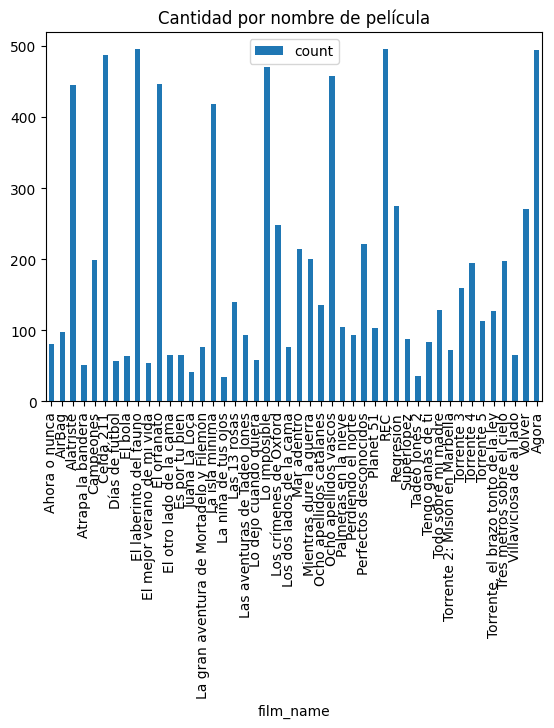

In [ ]:
# cuenta por nombre de película
df_03_film_name = df_02.groupby("film_name").count()
# todas las columnas me devuelven el mismo valor, entonces renombro una, el inplace
# lo hace en el mismo DataFrame sin copiarlo
df_03_film_name.rename(columns={"review_rate": "count"}, inplace=True)
# elimino el resto de la columnas
df_03_film_name.drop(["gender", "film_avg_rate", "review_title", "review_text"], axis=1, inplace=True)
# grafico
df_03_film_name.plot.bar(title="Cantidad por nombre de película")

<Axes: title={'center': 'Cantidad por género'}, xlabel='gender'>

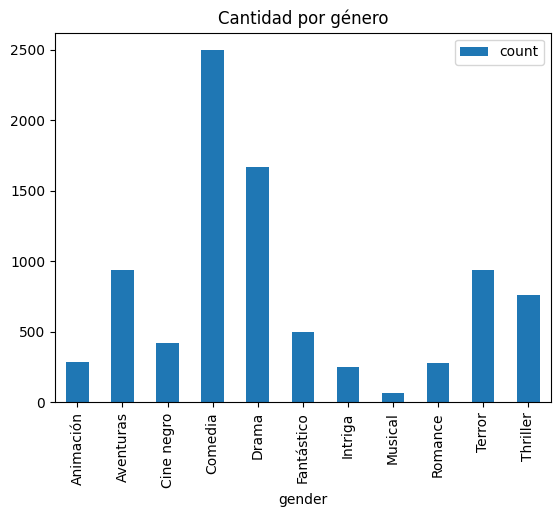

In [ ]:
# cuenta por género
df_03_gender = df_02.groupby("gender").count()
# todas las columnas me devuelven el mismo valor, entonces renombro una, el inplace
# lo hace en el mismo DataFrame sin copiarlo
df_03_gender.rename(columns={"review_rate": "count"}, inplace=True)
# elimino el resto de la columnas
df_03_gender.drop(["film_name", "film_avg_rate", "review_title", "review_text"], axis=1, inplace=True)
# grafico
df_03_gender.plot.bar(title="Cantidad por género")

# Ejercicio 05

Tomar los datasets del `ejercicio 03` (df_03_film_name, df_03_gender) y filtrar por las que tienen más de 400 review y graficarlos.



<Axes: title={'center': 'Cantidad por nombre de película'}, xlabel='film_name'>

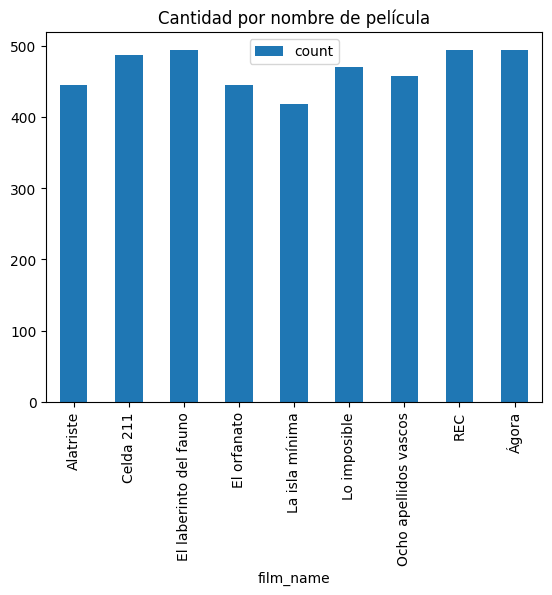

In [ ]:
df_03_film_name[df_03_film_name["count"]>400].plot.bar(title="Cantidad por nombre de película")

<Axes: title={'center': 'Cantidad por género'}, xlabel='gender'>

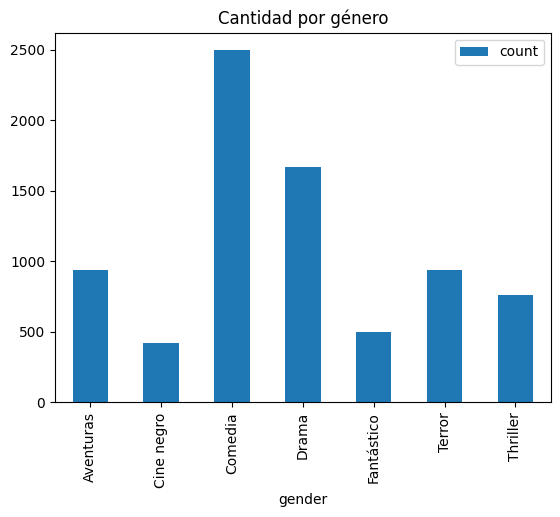

In [ ]:
df_03_gender[df_03_gender["count"]>400].plot.bar(title="Cantidad por género")

# Ejercicio 06

Tomar el dataset del ejercicio 02 (df_02), pasar los textos (review_text) a un diccionario.

Mostrar una tabla con el film_name y el total de punctuation. _Una película tiene muchas reviews_

```python
reviews = {
  "film_name": [{
    "position": posicion_de_la_review,
    "review_text": "...",
    "punctuation": cantidad_de_puntos_comas_y_puntos_y_comas
    }]
  }
```

In [ ]:
!pip install tabulate
import re
from tabulate import tabulate

In [ ]:
# creo una copia del DataFrame
df_02_copy = df_02.copy()
# elimino las columnas que no necesito
df_02_copy.drop(columns=["review_rate", "film_avg_rate", "review_title", "review_title", "gender"], inplace=True)
# paso el DataFrame a un diccionario
tmp = df_02_copy.to_dict()

reviews = {}
for kf,vf in tmp["film_name"].items():
  if vf not in reviews.keys():
    reviews[vf] = []
  data = {"position": kf}
  for kt,vt in tmp["review_text"].items():
    if kt == kf:
      data["review_text"]= vt
      data["punctuation"]=len(re.findall(r"(\.|,|;)", vt))
  reviews[vf].append(data)
# transformo el diccionario
tabla = [[k, sum([ vo["punctuation"] for vo in v])] for k,v in reviews.items()]
print(tabulate(tabla, headers=["film_name", "punctuation"]))


film_name                                  punctuation
---------------------------------------  -------------
Ocho apellidos vascos                            11630
Lo imposible                                     13099
Ocho apellidos catalanes                          3476
El orfanato                                       9880
La gran aventura de Mortadelo y Filemón           1816
Torrente 2: Misión en Marbella                    1277
Ágora                                            14557
Perfectos desconocidos                            5198
Mar adentro                                       4753
Torrente 4                                        4884
Campeones                                         3997
Las aventuras de Tadeo Jones                      2571
Torrente 3                                        2543
Tadeo Jones 2                                      906
Palmeras en la nieve                              3425
Alatriste                                        12219
Celda 211 

# Ejercicio 07

Tomar el diccionario del ejercicio 6 y verificar si hay fechas en los textos.

Mostrar el nombre de la película, la review y la posición

In [ ]:
patron = r"\d"
patron = r"(0[1-9]|[12]\d|3[01]|\d)\/(0[1-9]|1[0-2]|\d)\/(\d{4}|\d{2})"
for k,v in reviews.items():
  for p in v:
    if re.findall(patron, p["review_text"]):
      print("La película es ", k, ", la posición es ", p["position"], " y la review:\n", p["review_text"])
      print()

La película es  Ocho apellidos vascos , la posición es  58  y la review:
 Ocho apellidos vascos se ha convertido ya en un fenómeno social, siendo una de las películas españolas que más ha arrasado en la taquilla histórica de todos los tiempos. Y quizá vale la pena analizar la película desde un punto de vista sociológico más que artístico, porque no hay grandes hallazgos visuales o argumentales en la película como para destacar algo francamente novedoso o interesante. El film de hecho es una película artesanal, realizada por un director artesano como es Emilio Martínez Lázaro. La película se aprovecha del rocambolesco argumento para explotar una gran serie de situaciones cómicas, sin que haya realmente una conexión dramática entre ellas, sino que Ocho apellidos vascos se convierte en muchos momentos en una larga retahíla de tópicos, encorsetados con más o menos gracia en según qué momentos pero nunca con la función de explicar una historia detrás.Pero como decía, la historia ha cautivad